Activity 1 Week 6
-----------
Let's start with loading the libraries as per "RegressionBasic.ipynb" from Week 5.

In [1]:
import numpy
import matplotlib.pyplot as pl
# An important note, regressiondemo.py is only used for this Unit's laboratory
# for data generation and to illustrate some functions.  They are not available
# for actual data analytics projects.
import regressiondemo as rd
%matplotlib inline

We then proceed to create a true function for comparison purposes. Note that this doesn't exist in actual Data Analysis as if we know the true functions, we don't need to do the analysis.  The reason why we have created it is for illustration purposes on the concepts of bias and fit using linear regression.                                    

In [2]:
# The "true" function of x with range fixed at [0,10]

def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

Let's plot the true function for visualisation purposes.  We firstly generate a set of x-values using the function that is provided in the regressiondemo.py.  Then based on the x-values, we generate the y-values based on the true function.  When we plot this, we would expect the (x,y) points to be on the curve. (It is a rather smooth curve because we are using quite a lot of points, if you are using only 20 or 30 points, the plot will not be smooth).

Text(0.5, 0, 'x')

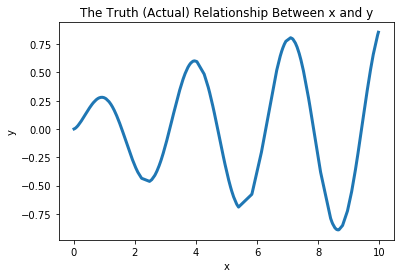

In [3]:
# Create 200 x-values using the regressiondemo.py function called makeX()
xts = rd.makeX(200)
# If you want to have the values spread out uniformly, you can uncomment and use the next line instead
#xts = rd.makeX(200, uniform=True)
# Use the truefunc() to create the matching y-values that fit that true equation
yts = truefunc(xts)

pl.plot(xts, yts, label = 'truth', linewidth=3.0)
# Uncomment the following line is you want to see the points
#pl.plot(xts, yts, 'x') 
pl.title("The Truth (Actual) Relationship Between x and y")
pl.ylabel('y')
pl.xlabel('x')

Now that we have the basis of the truth for us to illustrate some concepts.  Let's create (simulate) a set of 30 points that would reflect an actual collection of data, which would not be exactly matching the true function.  Remember that the x-values are the independent variables and the y-values are the dependent variables.  Hence this next part is to simulate the y-values (with noise).

In [4]:
# Don't make more than 100 points for this demo
points = 30

# The regressiondemo.py provides settings for noise level creation using standard deviation as the input
rd.setSigma(0.2)

# Let's create some (x,y) points, x being the independent variable.  The difference from the earlier makeX
# is that we now use the 'points' variable.
x = rd.makeX(points)
# y-values are based on the truefunc(x) but we want to add some noise to it.
y = rd.addNoise(truefunc(x))

## *Practise 1:*

Scatter plot the simulated data collection.  As an additional mini challenge, plot the points using the symbol 'x' instead of dots.

Text(0.5, 0, 'x')

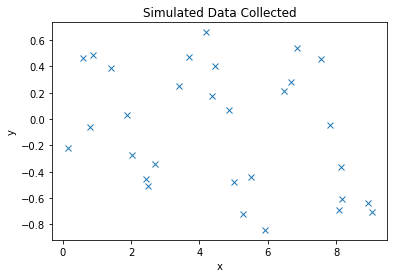

In [5]:
# Answer
pl.plot(x, y, 'x', label = 'data')
pl.title("Simulated Data Collected")
pl.ylabel('y')
pl.xlabel('x')

We now have the true relationship between x and y, as well as a set of simulated data that were collected.  The activity now is to *fit* different orders of polynomials to the regression to find the best fit.

## Step 1.1:  Fitting different orders of polynomials

We will try regression for a range of orders, or different degrees of the polynomial.  This means generating a set of *orders*.  We do this by starting with a maximum order that is slightly less than the number of *points* and then halve it until the order shrinks to 3.  We repeat the above code for the different orders.

Because we will be plotting many lines, we want to firstly make it a larger plotting area, called the canvas.

Text(0.5, 0, 'x')

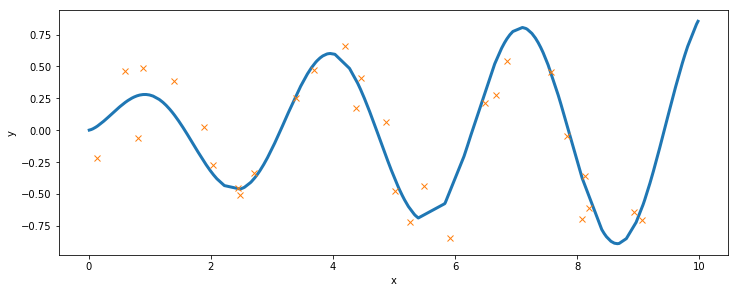

In [6]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=[12,4.5])

# Plot the true relationship between x and y
pl.plot(xts, yts, label = 'truth', linewidth=3.0) # default is green line?
# Plot the simulated collected data
pl.plot(x, y, 'x') 
pl.ylabel('y')
pl.xlabel('x')

In [24]:
# Build a set of polynomial orders to use to fit
# Note that the regressiondemo.py has a function makeOrders()
# that takes in the number of points we have and create
# a set of orders (polynomial orders in this case)
orders = rd.makeOrders(points)
print('Fitting polynomials of orders = ', orders)

Fitting polynomials of orders =  [3, 6, 12, 25]


## *Practise 2:*
- What’s the output of the print statement?

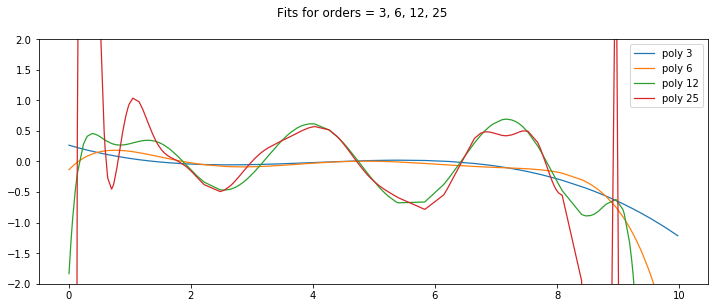

In [8]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=[12,4.5])
# If fitting goes a bit wild, need to constrain what y's are plotted
# Uncomment the following line and re-run this cell
pl.ylim(-2, 2)
# We now create a linear regression for each of the order that was generated
for order in orders:
    # Using the linear regression function in regressiondemo.py.
    # Again, note that this is for illustration purposes, for any
    # exercises, assignments, assessment, this is not to be used.
    ys = rd.linReg(x, y, xts, order)
    # Plot fitted curve
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1.25)
    
    # We want to have the legend for the lines
    pl.legend(bbox_to_anchor=(1, 1))
    pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

Let's put all of them together

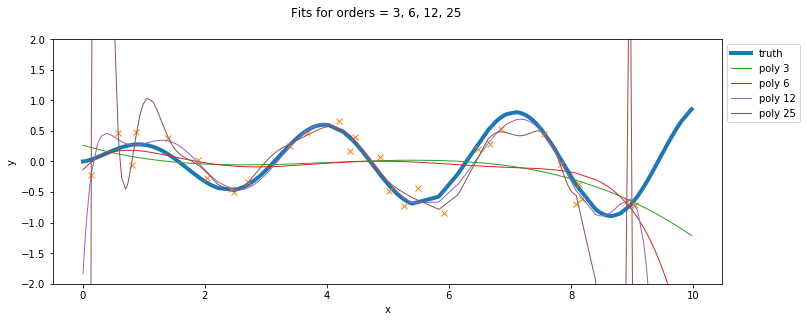

In [9]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=[12,4.5])

# Plot the true relationship between x and y
pl.plot(xts, yts, label = 'truth', linewidth=4) # default is green line?
# Plot the simulated collected data
pl.plot(x, y, 'x') 
pl.ylabel('y')
pl.xlabel('x')

# Build a set of polynomial orders to use to fit
# Note that the regressiondemo.py has a function makeOrders()
# that takes in the number of points we have and create
# a set of orders (polynomial orders in this case)
orders = rd.makeOrders(points)
#print('Fitting polynomials of orders = ', orders)

pl.ylim(-2, 2)
# We now create a linear regression for each of the order that was generated
for order in orders:
    # Using the linear regression function in regressiondemo.py.
    # Again, note that this is for illustration purposes, for any
    # exercises, assignments, assessment, this is not to be used.
    ys = rd.linReg(x, y, xts, order)
    # Plot fitted curve
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)
    
    # We want to have the legend for the lines
    pl.legend(bbox_to_anchor=(1, 1))
    pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

## *Practise 3: Questions*

- What do you see from the plots with the different polynomial dimensions (orders)?
- How well do higher dimensional polynomials work?
- Which order seems to give the best fit?

## Step 1.2:  How well can linear regression fit the "truth" anyway?
In order to understand how well any particular polynomial order can do, we can try generating a large number of points with little noise and see how well a polynomial of that order fits the (near-enough to) "infinite" sample.   Note in practice we can rarely do this because we rarely have an infinite sample of data; nor do we know the "truth".  So this is a "what if" scenario used to test out what happens with models of different orders.

The code below is not a step by step tutorial, as we have done it above.

Fitting polynomials of orders =  [3, 6, 12, 25]


Text(0.5, 0.98, 'Best possible fits')

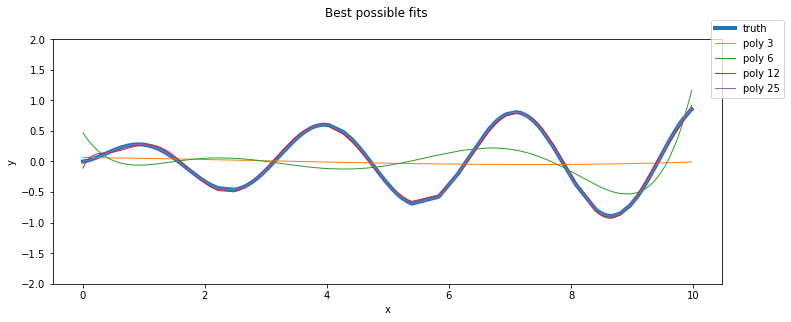

In [10]:
# Plot the truth
pl.figure(figsize=[12,4.5])
pl.plot(xts, yts, label = 'truth', linewidth = 4)
pl.ylabel('y')
pl.xlabel('x')
print ("Fitting polynomials of orders = ", orders)
        
for order in orders:
    ys = rd.bestLinReg(truefunc,xts,order)
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)  
    
pl.ylim(-2,2)

pl.legend(bbox_to_anchor=(1.1, 1.1))
pl.suptitle('Best possible fits')

So these curves represent the (near) best fits one can do to the "truth" with different orders of polynomials.  These best fits are in the sense of "least squares", the least squared error averaged over the $x$-range.  When fitting to finite samples, one will get more or less close to these best fits, the less data one has then generally the worse the fit will be.

So you should see that the higher orders of polynomial the best fit matches the true function.  There is an order of polynomial where the best possible fit becomes indistinguishable to the eye on these plots.  However, consider again  the "fits of different orders" plot.  For the higher orders, these fits (with a smallish amount of data) are not even close to the best possible fit.

## Model bias
This leads to some important concepts in statistical learning:

**Model family**: a model family is a class of models characterised by some higher order parameters, usually called *hyper-parameters*.  In the 2-D linear regressions here, the hyper-parameter is the order.  This leads to particular members of the family, 4-th order linear regression in 2-D, 10-th order linear regression in 2-D, *etc.*  To instantiate one of these to get a particular model instance or function, we need to give the coefficients to.  So an instance of 4-th order linear regression in 2-D would be fully instantiated with the 5 coefficients (1,1,0.5,0.2,0.1), one for the constant term and 4 for the powers.

**Bias**: how close can a particular member of the model family fit a particular "truth".  So for the curve *sin(x)* on some range [0,5], how close can one get with a 4-th order polynomial or a 10-th order polynomial?  We plotted the best fits in the previous cell.

**Large bias models**:  so small order polynomials can never fit the *sin(x)* function very well.  These members of the linear regression family are said to have *large bias*.

**Small bias models**:  so large order polynomials can usually fit the *sin(x)* function much better.  These members of the linear regression family are said to have *small bias*.

In general, **simple** models will have a large bias, and **complex** models will have a small bias.  

## *Practise 4: Question*
- Do we always go with the most complex models?  In this case the highest possible polynomial?

## Step 1.3:  The effect of different samples
Now another aspect of simple and complex models is how differently they behave with different data sets.  We saw a glimmer of this in an earlier plot, but here we will develop the comparison more.  Again, its important to keep in mind we cannot do this in practice, since usually we have one finite sample.  We do it here as part of a "what if" scenario in the unlikely situation where the "truth" is given.

So lets try a bunch of different samples of the same size, and see how well the different orders of polynomials do.  For this, we'll just use the largest four orders of the set of orders above.  

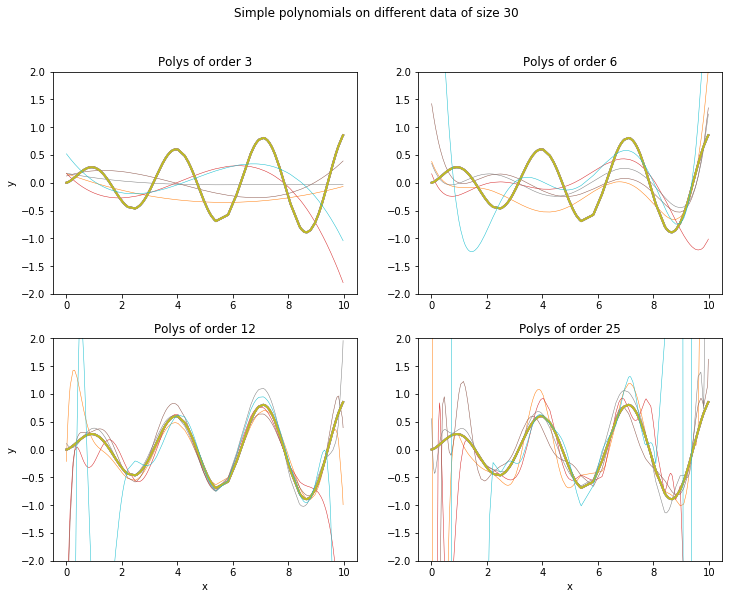

In [23]:
points = 30
orders = rd.makeOrders(points)

# This activity is also to show how you can plot a few graphs
# in one plot. Here we do a 2x2 plot, so need four orders to fit
fourorders = orders[-4:]
# Although the example used only has four, you can explore the
# code above to create more than 4 orders.  The line above this
# basically, takes the last 4 (-4 is count from the end of the
# list) numbers from the list.
#
# Alternatively, you can set the fourorders yourself, e.g.
# fourorders = [3,6,10,20]

# print()'Fitting polynomials of orders = ', fourorders)

setcount = 6
pl.figure(figsize=[12,9])
pl.suptitle('Simple polynomials on different data of size '+ str(points))

# Goes through an iteration to plot multiple graphs into one
for i in range(0,setcount-1):
    # Generate a sample for each graph
    xb = rd.makeX(points)
    yb = rd.addNoise(truefunc(xb))

    # To obtain the position in the subplot
    sp = 1;
    for order in fourorders:
        pl.subplot(2,2,sp)
        sp += 1

        # plot the truth
        pl.plot(xts, yts, linewidth = 2) # default is green line? 

        # Just for the axes to be labelled
        if sp>3:
            pl.xlabel('x')
        if sp%2==0:
            pl.ylabel('y')

        ys = rd.linReg(xb,yb,xts,order)
        pl.title('Polys of order ' + str(order))

        # Plot fitted curve
        pl.plot(xts, ys, linewidth = 0.5 )  
        # The y range for the plot has to be altered depending on the data
        pl.ylim(-2,2)        

Note: You may get a warning about the labelling of the axes. The next re-run, it will not be there.  It is just telling you that it will not override previous setting of the axes labels as you are using the same variable name.

The key thing to notice about this plot is the variability of the curves for the different orders of polynomials. One can measure this variability in different ways, to measure in some sense the difference between the different fits. Notice for the low order polynomial, the fits are similar to each other but all quite different from the "truth". In constrast, the high order polynomials oftentimes have good fits to the "truth" but in some places they go wild, and differ markedly between each other.

The standard measure of difference is the so-called variance:
> **Variance** is the mean square error between each fitted curve and the best possible fitted 
> curve (built with the same algorithm but using "infinite" data).

Variance measures difference between fitted curves and not difference from the truth. For simple models with large bias, the variance is small. For complex models with small bias, the variance would be small except for the occasion when it goes wild, leading to a large variance overall.

## *Practise 5: Question*
- What would better variance mean technically?
- Which polynomial dimension gives you the best variance from the above plots?
